In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# gray = cv2.cvtColor(cv2.imread("../data/hist_eq/PA200757.png"), cv2.COLOR_BGR2GRAY)
color = cv2.imread("../data/hist_eq/PA200757.jpg")


# print(gray.shape)
print(color.shape)

(1500, 2000, 3)


In [4]:
color.dtype

dtype('uint8')

In [62]:
def plot(img, title, color = True, file_path: str = None):
    # plt.figure(figsize=(10,10))
    plt.style.use("seaborn-v0_8-white")
    plt.figure(figsize=(8,5))
    plt.title(title)
    if color:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap="gray")
    
    plt.savefig(file_path) if file_path else plt.show()

In [6]:
# plot(gray, "")

In [7]:
def enhance_contrast(img, alpha, beta):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# def enhance_contrast_color(img, alpha, beta):
#     img_copy = img.copy()
#     # cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
#     return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

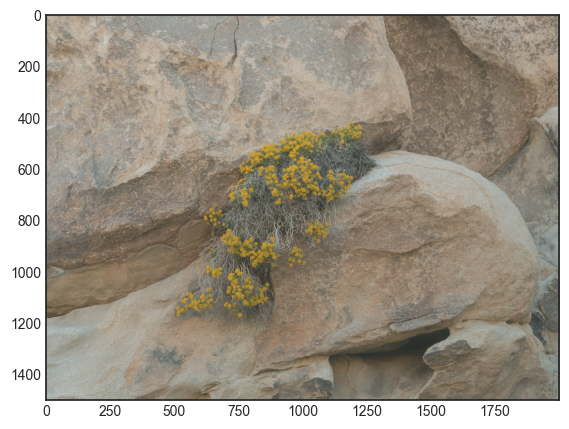

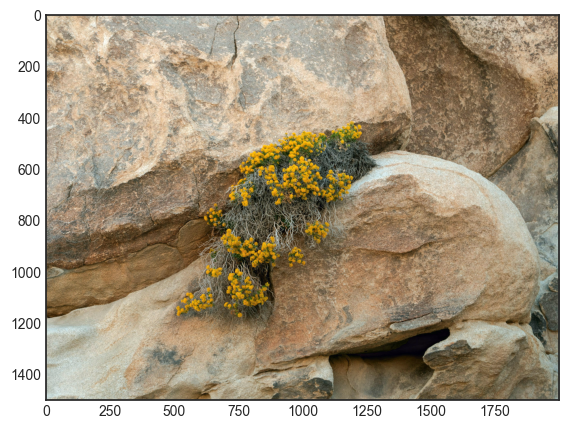

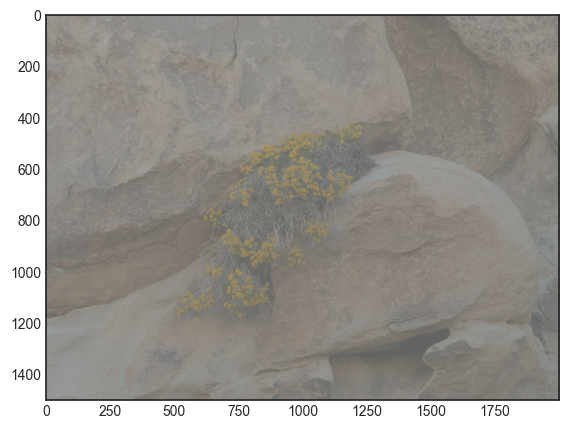

In [75]:
# img = color.copy()
# img[:, :, 0] = 1.1 * img[:, :, 0]
# img[:, :, 1] = img[:, :, 1]
# img[:, :, 2] = img[:, :, 2]

# dst = cv.equalizeHist(src)
plot(cv2.convertScaleAbs(color), "",)
plot(enhance_contrast(color, 1.7, -90), "")
plot(enhance_contrast(color, 0.4, 80), "")

In [82]:
# plot(enhance_contrast(color, 1.7, -90), "", True, "../data/hist_eq/contrast_enhanced.jpg")
cv2.imwrite("../data/hist_eq/contrast_enhanced.jpg", enhance_contrast(color, 1.7, -90))
cv2.imwrite("../data/hist_eq/contrast_reduced.jpg", enhance_contrast(color, 0.35, 80))

True

In [53]:
# cv2.cvtColor(enhance_contrast(color, 1.7, -80)
print(cv2.cvtColor(color, cv2.COLOR_BGR2LUV)[:,:,0].mean())
print(enhance_contrast(cv2.cvtColor(color, cv2.COLOR_BGR2LUV)[:,:,0], 1.7, -90).mean())
print(enhance_contrast(cv2.cvtColor(color, cv2.COLOR_BGR2LUV)[:,:,0], 0.45, 100).mean())

142.97840566666667
153.12625533333335
164.340045


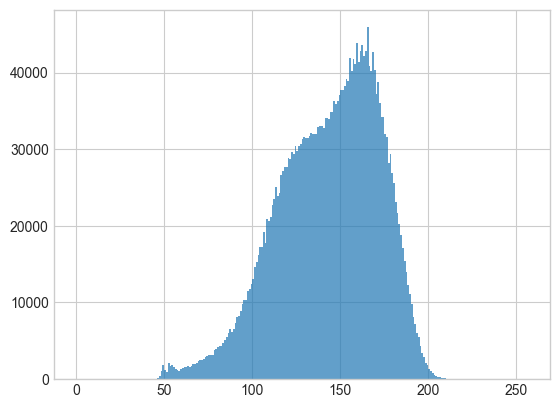

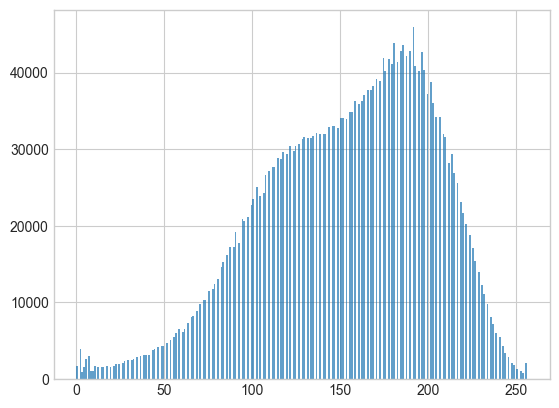

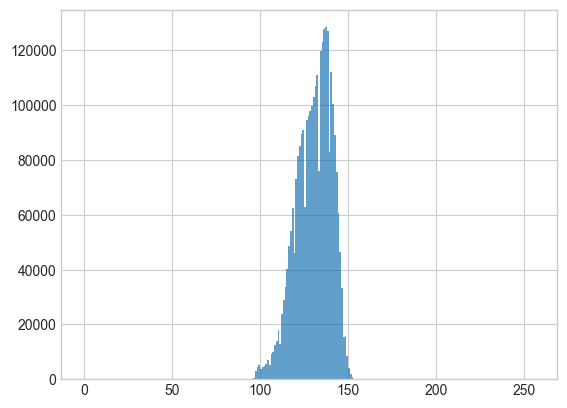

In [83]:
plt.style.use("seaborn-v0_8-whitegrid")

plt.hist(cv2.cvtColor(color, cv2.COLOR_BGR2LUV)[:,:,0].ravel(), 256, [0, 256], alpha=0.7)
plt.show()


plt.hist(enhance_contrast(cv2.cvtColor(color, cv2.COLOR_BGR2LUV)[:,:,0], 1.7, -90).ravel(), 256, [0, 256], alpha=0.7)
plt.show()

plt.hist(enhance_contrast(cv2.cvtColor(color, cv2.COLOR_BGR2LUV)[:,:,0], 0.35, 80).ravel(), 256, [0, 256], alpha=0.7)
plt.show()

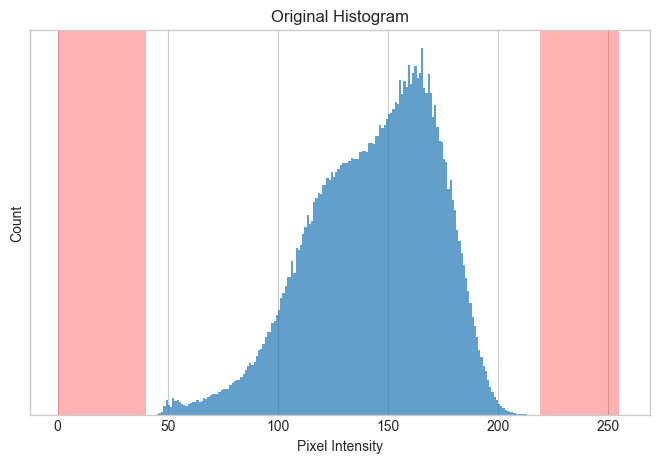

In [67]:
h = cv2.cvtColor(color, cv2.COLOR_BGR2LUV)[:,:,0].ravel()

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(8,5))

plt.hist(h, 256, [0, 256], alpha=0.7)
plt.axvspan(0, h.min(), color="red", alpha=0.3, lw=0)
plt.axvspan(h.max(), 255, color="red", alpha=0.3, lw=0)
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.yticks([])
plt.show()

In [31]:
h.min(), h.max()

(40, 219)

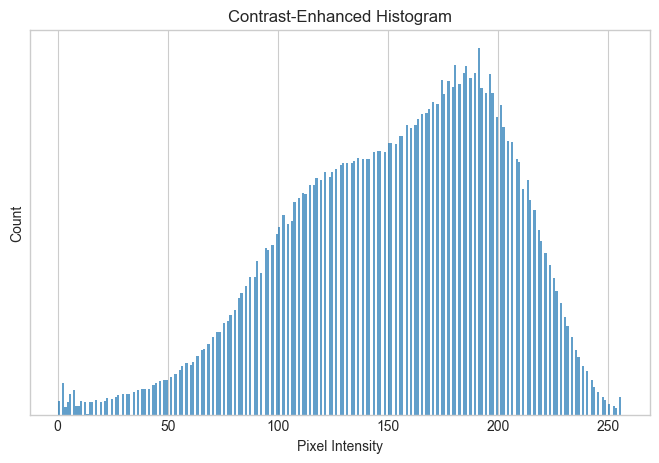

In [71]:
# h = cv2.cvtColor(enhance_contrast(color, 1.7, -80), cv2.COLOR_BGR2RGB).ravel()
h = enhance_contrast(cv2.cvtColor(color, cv2.COLOR_BGR2LUV)[:,:,0], 1.7, -90).ravel()

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(8,5))

plt.hist(h, 256, [0, 256], alpha=0.7)
plt.title("Contrast-Enhanced Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.yticks([])
plt.show()

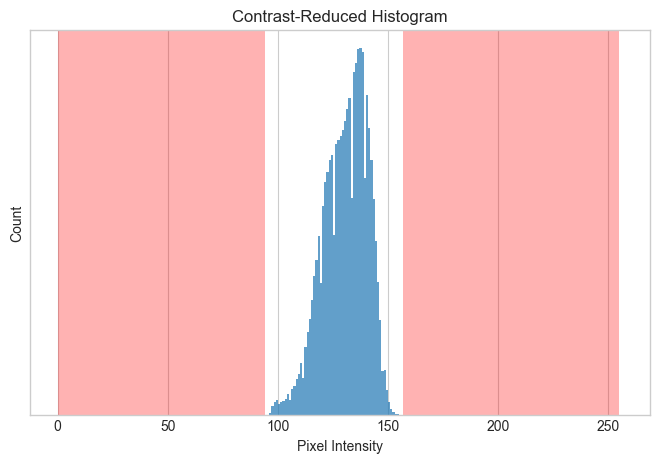

In [81]:
h = enhance_contrast(cv2.cvtColor(color, cv2.COLOR_BGR2LUV)[:,:,0], 0.35, 80).ravel()

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(8,5))

plt.hist(h, 256, [0, 256], alpha=0.7)
plt.axvspan(0, h.min(), color="red", alpha=0.3, lw=0)
plt.axvspan(h.max(), 255, color="red", alpha=0.3, lw=0)
plt.title("Contrast-Reduced Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.yticks([])
plt.show()

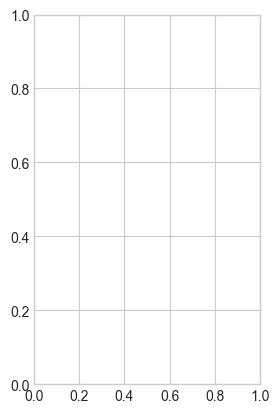

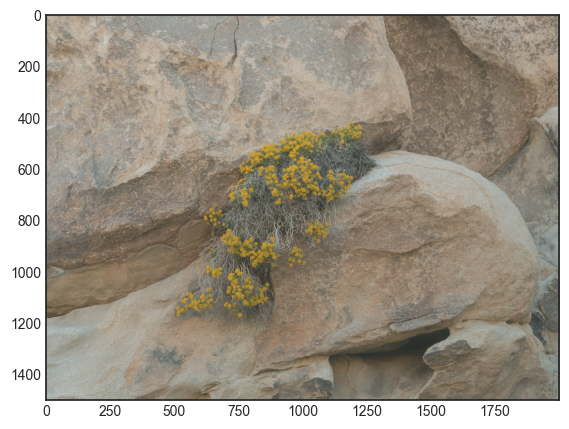

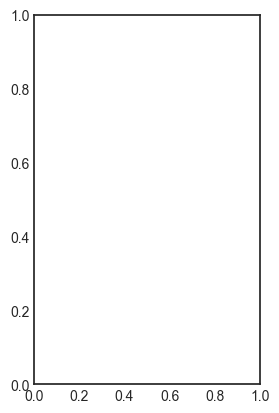

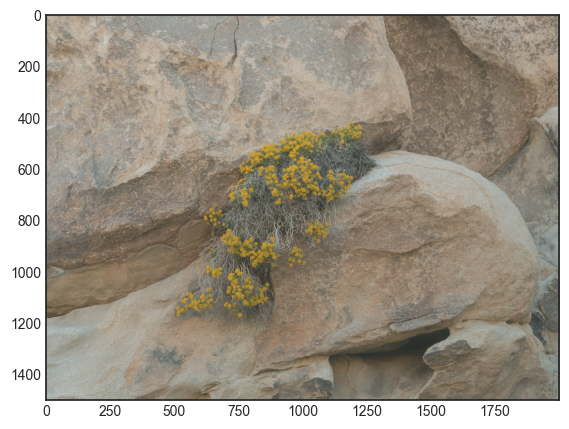

In [65]:
plt.style.use("seaborn-v0_8-whitegrid")

plt.subplot(1,2,1)
plot(cv2.convertScaleAbs(color), "",)

plt.subplot(1,2,2)
plot(cv2.convertScaleAbs(color), "",)

plt.show()

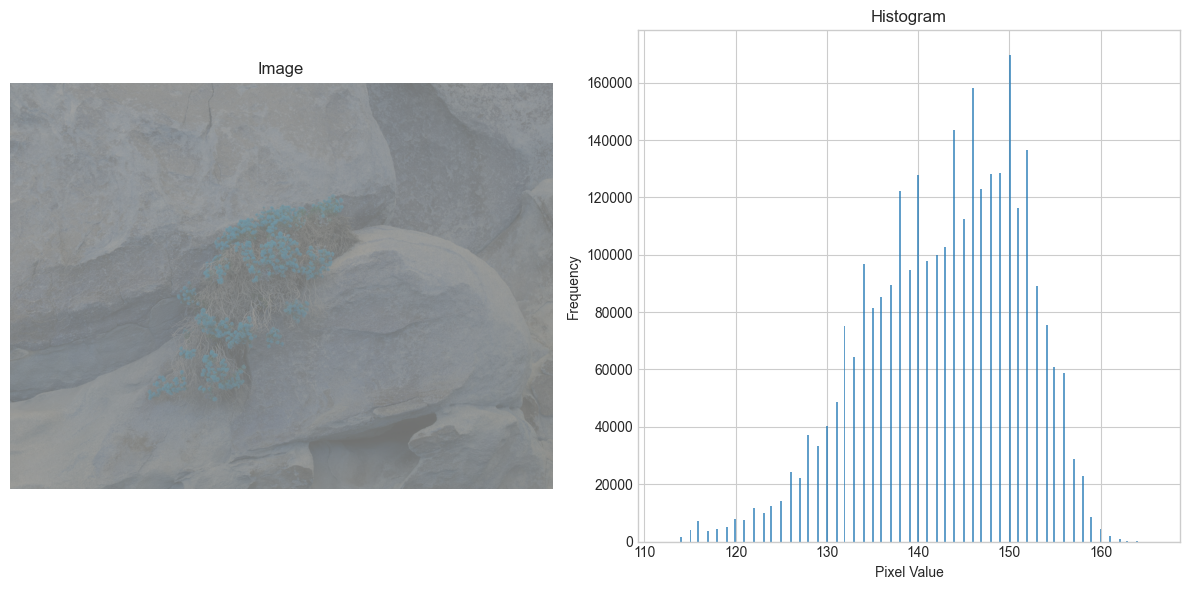

In [73]:
# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the image on the first subplot
ax1.imshow(enhance_contrast(color, 0.3, 100))
ax1.set_title("Image")
ax1.axis("off")  # Turn off axis

# Display the histogram on the second subplot
ax2.hist(enhance_contrast(cv2.cvtColor(color, cv2.COLOR_BGR2LUV)[:,:,0], 0.3, 100).ravel(), bins=256, alpha=0.7)
ax2.set_title('Histogram')
ax2.set_xlabel('Pixel Value')
ax2.set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()